In [ ]:
import matplotlib.pyplot as plt # data visualisation
import pandas as pd #data manipulation and analysis
import numpy as np #data processing and manipulation
import seaborn as sns #data visualisation

In [ ]:
# imports for preprocesing the text for twitter datset
import nltk #suite of libraries and programs for NLP
import re #Regular expression
import string #to use ascii letters
# Wordcloud Represents text data with size of words
# Stopwords : words such as 'a','an','he' to be ignored
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Plot confusion_matrix , classification report and accuracy score are used to check accuracy of model as well as precision and recall
# They also have FP,FN,TP and TN
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score
# Used for Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
# Used to split data
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

In [ ]:
#Mount the drive to load the dataset
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/twitter_project.csv'


In [ ]:
data = pd.read_csv(file_path,engine = 'python')
data.columns = ['sentiment', 'id' ,'date', 'query', 'user', 'tweets']
data["length of tweet"]= data["tweets"].str.len()

In [ ]:
# Count of Positive(4) Class and negative(0) Class 
c = data["sentiment"].value_counts()
print(c)

4    800000
0    799999
Name: sentiment, dtype: int64


In [ ]:
data.head()

,sentiment,id,date,query,user,tweets,length of tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29


In [ ]:
data.isnull().sum()

sentiment          0
id                 0
date               0
query              0
user               0
tweets             0
length of tweet    0
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
# Function to remove spaces
def remove_spaces(text):
  return re.sub(' +',' ',text)

data["tweets"] = data["tweets"].apply(lambda text: remove_spaces(text))
# Function to remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

data["tweets"] = data["tweets"].apply(lambda text: remove_urls(text))
# Function to remove punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["tweets"] = data["tweets"].apply(lambda text: remove_punctuation(text))

data["tweets"] = data["tweets"].apply(lambda text: " ".join(text.split()))

data.head()


,sentiment,id,date,query,user,tweets,length of tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...,111
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times for the ball Manag...,89
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...,111
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,Kwesidei not the whole crew,29


In [ ]:
# Tokenization of text
nltk.download('words')
wds = set(nltk.corpus.words.words())

data['tweets'] = data['tweets'].apply(lambda text: " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in wds))
data.head()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


,sentiment,id,date,query,user,tweets,length of tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his by it and mig...,111
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I many times for the ball to save The rest go ...,89
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body itchy and like its on fire,47
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not at all mad why am i here because I ...,111
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew,29


In [ ]:
#new addition for comparing using ngrams 
#from nltk import ngrams
#def ngrams(input_list):
 #   bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
  #  trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
   # return bigrams+trigrams
#data['tweets'] = tweets.normalized_tweet.apply(ngrams)
#tweets[['tweets']].head()

In [ ]:
data2 = data[['sentiment', 'tweets']]
data2.head()

,sentiment,tweets
0,0,is upset that he cant update his by it and mig...
1,0,I many times for the ball to save The rest go ...
2,0,my whole body itchy and like its on fire
3,0,no its not at all mad why am i here because I ...
4,0,not the whole crew


In [ ]:
def makestring(s): 
    ans = " "       
    return (ans.join(s))

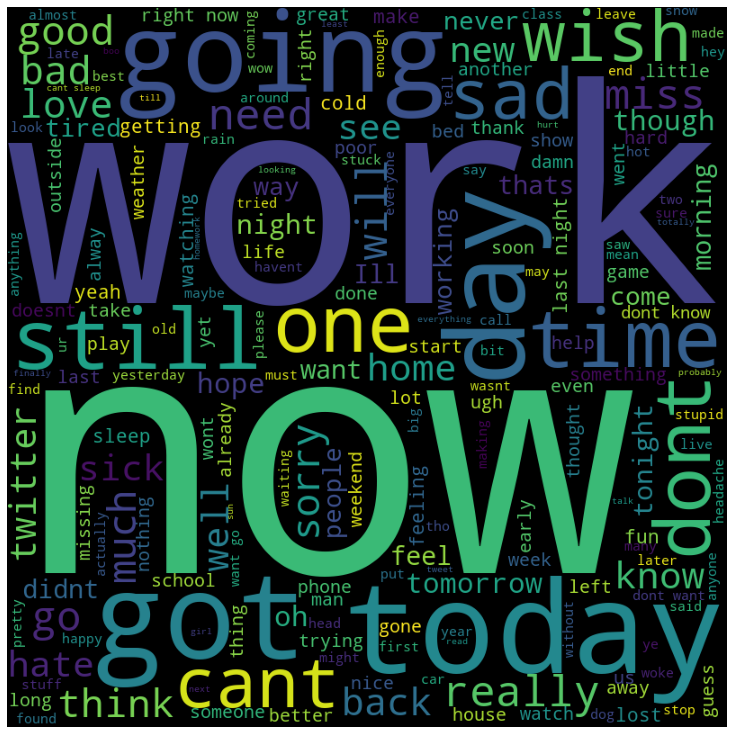

In [ ]:
textneg=makestring(data2[data2['sentiment']==0]['tweets'])
wc0= WordCloud(width = 800, height = 800,background_color ='black',stopwords = STOPWORDS,min_font_size = 8).generate(textneg)          
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wc0)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

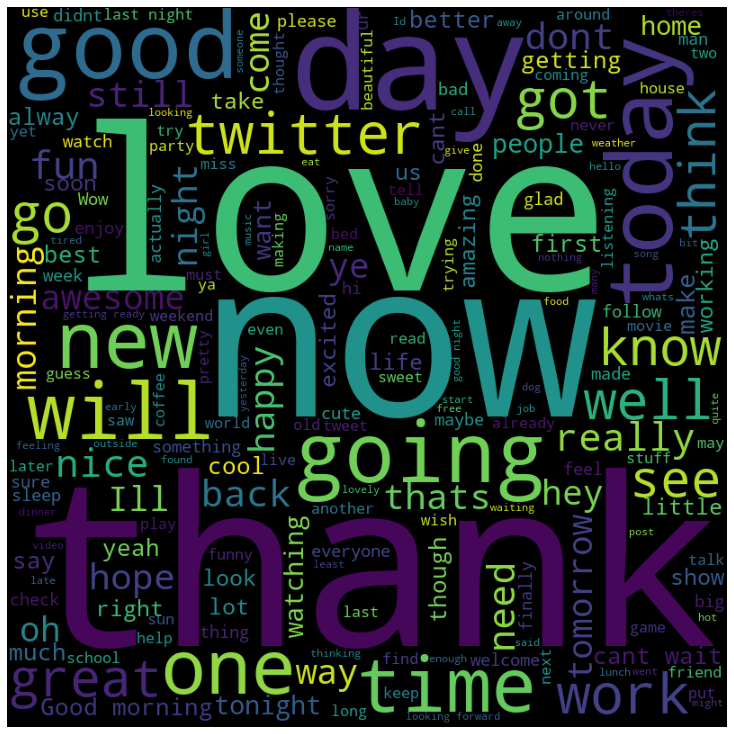

In [ ]:
textpos=makestring(data2[data2['sentiment']==4]['tweets'])
  
wc1= WordCloud(width = 800, height = 800,background_color ='black',stopwords = STOPWORDS,min_font_size = 8).generate(textpos)
                      
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wc1)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
data.head()

,sentiment,id,date,query,user,tweets,length of tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his by it and mig...,111
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I many times for the ball to save The rest go ...,89
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body itchy and like its on fire,47
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not at all mad why am i here because I ...,111
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew,29


In [ ]:
data = data.drop(columns=['id','query','user','date'],axis = 1)

In [ ]:
data.head()

,sentiment,tweets,length of tweet
0,0,is upset that he cant update his by it and mig...,111
1,0,I many times for the ball to save The rest go ...,89
2,0,my whole body itchy and like its on fire,47
3,0,no its not at all mad why am i here because I ...,111
4,0,not the whole crew,29


In [ ]:
x = data['tweets']
y = data['sentiment']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

#svm

In [ ]:
from sklearn import svm

In [ ]:
data.head()

,sentiment,tweets,length of tweet
0,0,is upset that he cant update his by it and mig...,111
1,0,I many times for the ball to save The rest go ...,89
2,0,my whole body itchy and like its on fire,47
3,0,no its not at all mad why am i here because I ...,111
4,0,not the whole crew,29


In [ ]:
x3train, x3test, y3train, y3test= xtrain, xtest, ytrain, ytest

In [ ]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(x3train)
test_vectors = vectorizer.transform(x3test)

In [ ]:
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, y3train)
prediction_linear = classifier_linear.predict(test_vectors)



positive:  {'precision': 0.7380434782608696, 'recall': 0.7737891737891738, 'f1-score': 0.7554937413073713, 'support': 5265}
negative:  {'precision': 0.7490518331226296, 'recall': 0.7108578284343131, 'f1-score': 0.7294552169898431, 'support': 5001}


In [ ]:
report = classification_report(y3test, prediction_linear, output_dict=True)
print('positive: ', report['4'])
print('negative: ', report['0'])
print(accuracy_score(y3test,prediction_linear))
accscore1 = accuracy_score(y3test,prediction_linear)

positive:  {'precision': 0.7380434782608696, 'recall': 0.7737891737891738, 'f1-score': 0.7554937413073713, 'support': 5265}
negative:  {'precision': 0.7490518331226296, 'recall': 0.7108578284343131, 'f1-score': 0.7294552169898431, 'support': 5001}
0.7431326709526592


In [ ]:
classifier_p = svm.SVC(kernel='poly')
classifier_p.fit(train_vectors, y3train)
prediction_p = classifier_p.predict(test_vectors)


In [ ]:
report = classification_report(y3test, prediction_p, output_dict=True)
print('positive: ', report['4'])
print('negative: ', report['0'])
print(accuracy_score(y3test,prediction_p))
accscsore2 = accuracy_score(y3test,prediction_p)

positive:  {'precision': 0.7318712415988681, 'recall': 0.7859449192782526, 'f1-score': 0.757944866746039, 'support': 5265}
negative:  {'precision': 0.7556374674761491, 'recall': 0.6968606278744252, 'f1-score': 0.7250598148340789, 'support': 5001}
0.7425482174167154


In [ ]:
classifier_rbf = svm.SVC(kernel='rbf')
classifier_rbf.fit(train_vectors, y3train)
prediction_rbf = classifier_rbf.predict(test_vectors)


In [ ]:
report = classification_report(y3test, prediction_rbf, output_dict=True)
print('positive: ', report['4'])
print('negative: ', report['0'])
print(accuracy_score(y3test,prediction_rbf))
accscore3 = accuracy_score(y3test,prediction_rbf)

positive:  {'precision': 0.7482695810564663, 'recall': 0.7802469135802469, 'f1-score': 0.7639237563923756, 'support': 5265}
negative:  {'precision': 0.7577470686767169, 'recall': 0.7236552689462108, 'f1-score': 0.7403088882070165, 'support': 5001}
0.7526787453730762


In [ ]:
classifier_s = svm.SVC(kernel='sigmoid')
classifier_s.fit(train_vectors, y3train)
prediction_s = classifier_s.predict(test_vectors)

In [ ]:
report = classification_report(y3test, prediction_s, output_dict=True)
print('positive: ', report['4'])
print('negative: ', report['0'])
print(accuracy_score(y3test,prediction_s))
accscore4 = accuracy_score(y3test,prediction_s)

positive:  {'precision': 0.7356699525374224, 'recall': 0.7654320987654321, 'f1-score': 0.7502559806385554, 'support': 5265}
negative:  {'precision': 0.7420634920634921, 'recall': 0.7104579084183164, 'f1-score': 0.7259168454387577, 'support': 5001}
0.7386518605104228


# Bayes Classification

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB


In [ ]:
data.head()

,sentiment,tweets,length of tweet
0,0,is upset that he cant update his by it and mig...,111
1,0,I many times for the ball to save The rest go ...,89
2,0,my whole body itchy and like its on fire,47
3,0,no its not at all mad why am i here because I ...,111
4,0,not the whole crew,29


In [ ]:
x1train, x1test, y1train, y1test = xtrain, xtest, ytrain, ytest

In [ ]:
clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])


In [ ]:
clf.fit(x1train, y1train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
y1pred=clf.predict(x1test)
y1pred

array([4, 0, 4, ..., 0, 4, 4])

In [ ]:
report1= classification_report(y1test, y1pred, output_dict=True)
print('positive: ', report1['4'])
print('negative: ', report1['0'])
print('Accuracy on the Multinomial Naive Bayes: ', accuracy_score(y1test, y1pred)*100)
accscore5 = accuracy_score(y1test, y1pred)

positive:  {'precision': 0.7358245026956683, 'recall': 0.7517568850902184, 'f1-score': 0.743705373919579, 'support': 5265}
negative:  {'precision': 0.7325557601800696, 'recall': 0.7158568286342731, 'f1-score': 0.7241100323624595, 'support': 5001}
Accuracy on the Multinomial Naive Bayes:  73.42684589908436


# Decision Tree

In [ ]:
x2_train, x2_test, y2_train, y2_test= xtrain, xtest, ytrain, ytest


In [ ]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
x2train = vectorizer.fit_transform(x2_train)
x2test = vectorizer.transform(x2_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Train a decision tree model
dec_tree = DecisionTreeClassifier().fit(x2train, y2_train)
# Predict the label
y2_dec_predicted = dec_tree.predict(x2test)

In [ ]:
# main.py -> train_dec_trees_model() function
# Print accuracy score on test set
report2= classification_report(y2_test, y2_dec_predicted, output_dict=True)
print('positive: ', report2['4'])
print('negative: ', report2['0'])
print('Accuracy on the decision tree: ', accuracy_score(y2_test, y2_dec_predicted)*100)
accscore6 = accuracy_score(y2_test, y2_dec_predicted)

positive:  {'precision': 0.665098777046096, 'recall': 0.671415004748338, 'f1-score': 0.6682419659735349, 'support': 5265}
negative:  {'precision': 0.650575641284589, 'recall': 0.6440711857628474, 'f1-score': 0.6473070739549839, 'support': 5001}
Accuracy on the decision tree:  65.80946814728229


In [ ]:
# Train a decision tree model
dec_entropy_tree = DecisionTreeClassifier(criterion="entropy").fit(x2train, y2_train)
# Predict the label
y2_dec_entropy_predicted = dec_ent_tree.predict(x2test)


In [ ]:
report2_ent= classification_report(y2_test, y2_dec_ent_predicted, output_dict=True)
print('positive: ', report2_ent['4'])
print('negative: ', report2_ent['0'])
print('Accuracy on the decision tree (Entropy Classifier): ', accuracy_score(y2_test, y2_dec_entropy_predicted)*100)
accscore7 = accuracy_score(y2_test, y2_dec_entropy_predicted)

positive:  {'precision': 0.6639646278555638, 'recall': 0.6845204178537512, 'f1-score': 0.6740858505564388, 'support': 5265}
negative:  {'precision': 0.6566763125258371, 'recall': 0.6352729454109178, 'f1-score': 0.6457973371277569, 'support': 5001}
Accuracy on the decision tree (Entropy Classifier):  66.05299045392557


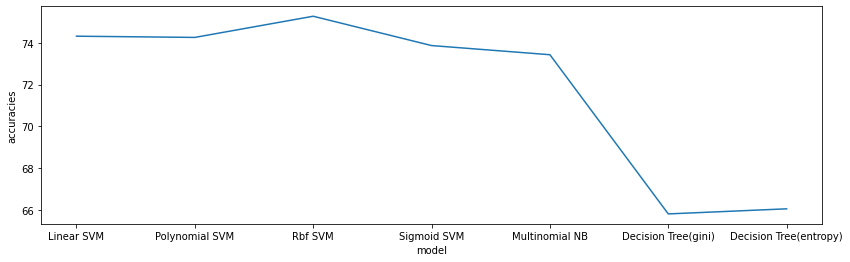

In [ ]:
data = {
  "model" : ['Linear SVM','Polynomial SVM','Rbf SVM','Sigmoid SVM','Multinomial NB','Decision Tree(gini)','Decision Tree(entropy)'] ,
  "accuracies": [accscore1,accscore2,accscore3,accscore4,accscore5,accscore6,accscore7]
}
df=pd.DataFrame(data)
plt.figure(figsize=(14,4))
sns.lineplot(data=df, x="model", y="accuracies")
plt.show()